# Training the model

Importing the important library

In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset= pd.read_csv("loan-train.csv")

In [3]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
dataset.shape

(614, 13)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
pd.crosstab(dataset["Credit_History"],dataset["Loan_Status"], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<Axes: >

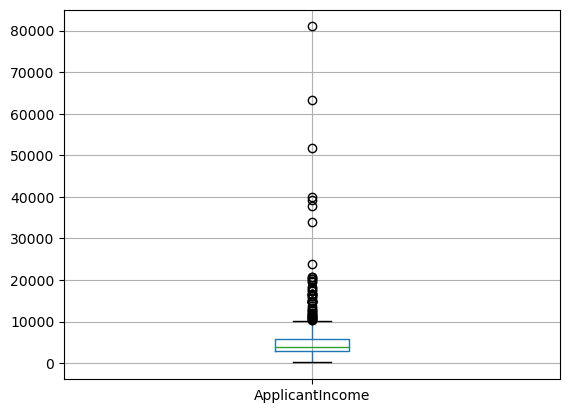

In [8]:
dataset.boxplot(column='ApplicantIncome')

<Axes: >

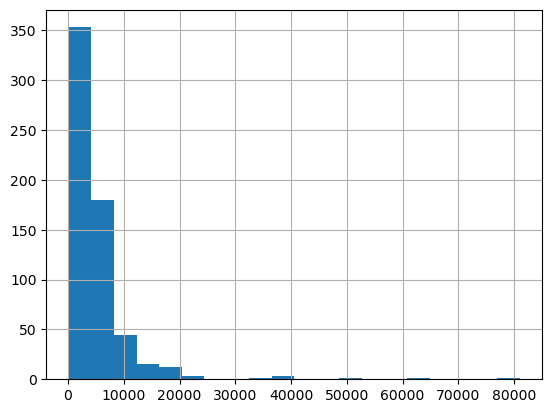

In [9]:
dataset["ApplicantIncome"].hist(bins=20)

<Axes: >

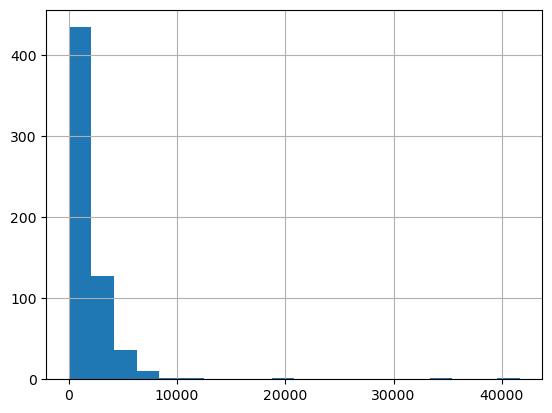

In [10]:
dataset["CoapplicantIncome"].hist(bins=20)

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

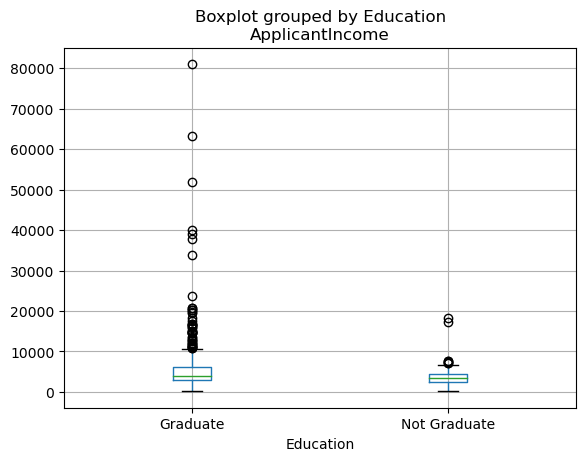

In [13]:
dataset.boxplot(column="ApplicantIncome", by="Education")

Normalizing the data

In [85]:
dataset["TotalIncome"]=dataset['ApplicantIncome']+dataset['CoapplicantIncome']
dataset['TotalIncome_log']=np.log(dataset["TotalIncome"])

<Axes: >

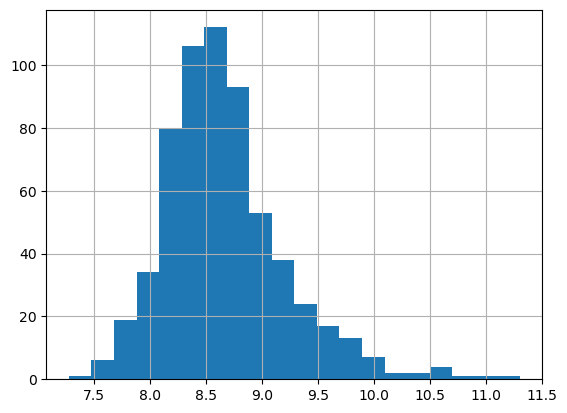

In [86]:
dataset['TotalIncome_log'].hist(bins=20)

<Axes: >

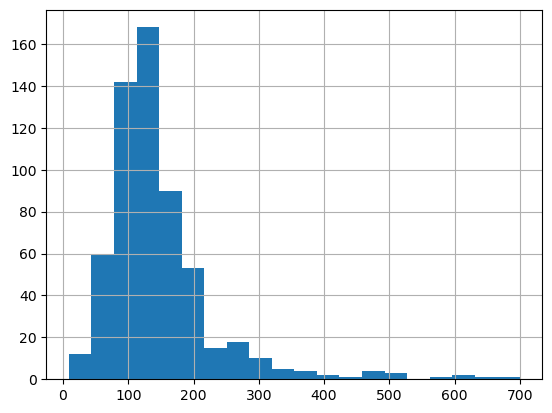

In [14]:
dataset["LoanAmount"].hist(bins=20)

In [15]:
dataset["LoanAmount_log"]= np.log(dataset["LoanAmount"])  

<Axes: >

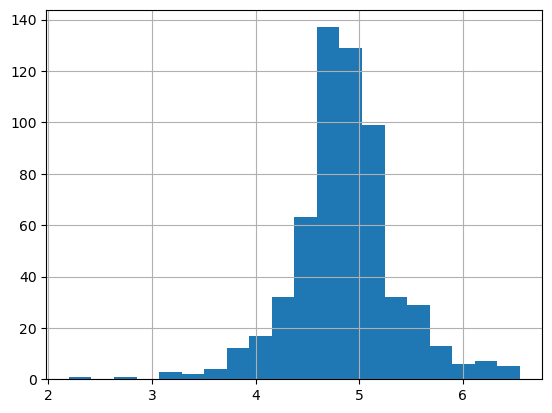

In [16]:
dataset["LoanAmount_log"].hist(bins=20)  

Handling the null values

In [17]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
TotalIncome           0
TotalIncome_log       0
LoanAmount_log       22
dtype: int64

In [18]:
dataset['Gender'].fillna(dataset['Gender'].mode()[0],inplace=True)

In [19]:
dataset['Married'].fillna(dataset['Married'].mode()[0],inplace=True)

In [20]:
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0],inplace=True)

In [21]:
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0],inplace=True)

In [22]:
dataset.LoanAmount=dataset.LoanAmount.fillna(dataset.LoanAmount.mean())

In [23]:
dataset.LoanAmount_log=dataset.LoanAmount.fillna(dataset.LoanAmount_log.mean())

In [24]:
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0],inplace=True)

In [25]:
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0],inplace=True)

In [26]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
TotalIncome          0
TotalIncome_log      0
LoanAmount_log       0
dtype: int64

In [27]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,146.412162
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.714568,128.000000
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,66.000000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,8.505323,120.000000
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,141.000000


In [28]:
x= dataset.iloc[:,np.r_[1:5,9:11,13:15]].values
y= dataset.iloc[:,12].values

In [29]:
x

array([['Male', 'No', '0', ..., 1.0, 5849.0, 8.674025985443025],
       ['Male', 'Yes', '1', ..., 1.0, 6091.0, 8.714567550836485],
       ['Male', 'Yes', '0', ..., 1.0, 3000.0, 8.006367567650246],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 8312.0, 9.025455532779063],
       ['Male', 'Yes', '2', ..., 1.0, 7583.0, 8.933664178700935],
       ['Female', 'No', '0', ..., 0.0, 4583.0, 8.430109084509125]],
      dtype=object)

In [30]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

Splitting the data into train and test dataset
x_train, x_test have dependent variable
y-tain, y_test have independent variable

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [32]:
print(x_train)

[['Male' 'Yes' '0' ... 1.0 5858.0 8.675563527387679]
 ['Male' 'No' '1' ... 1.0 11250.0 9.328123407632566]
 ['Male' 'Yes' '0' ... 0.0 5681.0 8.644882552557126]
 ...
 ['Male' 'Yes' '3+' ... 1.0 8334.0 9.0280988119824]
 ['Male' 'Yes' '0' ... 1.0 6033.0 8.704999678440762]
 ['Female' 'Yes' '0' ... 1.0 6486.0 8.777401286867264]]


In [33]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x=LabelEncoder()

In [34]:
for i in range (0,5):
    x_train[:,i]=labelencoder_x.fit_transform( x_train[:,i])


In [35]:
x_train[:,7]=labelencoder_x.fit_transform( x_train[:,7])

In [36]:
x_train

array([[1, 1, 0, ..., 1.0, 5858.0, 267],
       [1, 0, 1, ..., 1.0, 11250.0, 407],
       [1, 1, 0, ..., 0.0, 5681.0, 249],
       ...,
       [1, 1, 3, ..., 1.0, 8334.0, 363],
       [1, 1, 0, ..., 1.0, 6033.0, 273],
       [0, 1, 0, ..., 1.0, 6486.0, 301]], dtype=object)

Converting categorical text into numeric format using label encoder

In [37]:
labelencoder_y=LabelEncoder()
y_train=labelencoder_y.fit_transform(y_train)

In [38]:
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [39]:
for i in range (0,5):
    x_test[:,i]=labelencoder_x.fit_transform( x_test[:,i])

In [40]:
x_test[:,7]=labelencoder_x.fit_transform( x_test[:,7])

In [41]:
x_test

array([[1, 0, 0, 0, 5, 1.0, 7085.0, 85],
       [0, 0, 0, 0, 5, 1.0, 4230.0, 28],
       [1, 1, 0, 0, 5, 1.0, 10039.0, 104],
       [1, 1, 0, 0, 5, 1.0, 6784.0, 80],
       [1, 1, 2, 0, 5, 1.0, 3875.0, 22],
       [1, 1, 0, 1, 3, 0.0, 6058.0, 70],
       [1, 1, 3, 0, 3, 1.0, 6417.0, 77],
       [1, 0, 0, 0, 5, 1.0, 12876.0, 114],
       [1, 0, 0, 0, 5, 0.0, 5124.0, 53],
       [1, 1, 0, 0, 5, 1.0, 5233.0, 55],
       [0, 0, 0, 0, 5, 1.0, 2917.0, 4],
       [1, 1, 1, 0, 5, 1.0, 2895.0, 2],
       [0, 0, 0, 0, 5, 1.0, 8333.0, 96],
       [1, 1, 2, 0, 5, 1.0, 8667.0, 97],
       [1, 1, 0, 0, 5, 1.0, 14880.0, 117],
       [1, 1, 1, 0, 5, 1.0, 3875.0, 22],
       [1, 0, 1, 1, 5, 1.0, 4311.0, 32],
       [1, 0, 0, 1, 5, 1.0, 3946.0, 25],
       [0, 0, 0, 0, 5, 1.0, 2500.0, 1],
       [1, 1, 0, 1, 5, 0.0, 4787.0, 44],
       [0, 1, 0, 0, 5, 0.0, 6085.0, 71],
       [1, 1, 0, 0, 5, 1.0, 4765.0, 43],
       [1, 1, 2, 0, 5, 1.0, 7550.0, 91],
       [1, 1, 2, 0, 5, 1.0, 11500.0, 111],
       [1, 

In [42]:
labelencoder_y=LabelEncoder()
y_test=labelencoder_y.fit_transform(y_test)

In [43]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

Scaling the dataset

In [44]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

Applying algorithm and checking the accuracy

In [45]:
from sklearn.tree import DecisionTreeClassifier
dtclassifier=DecisionTreeClassifier(criterion='entropy', random_state=0)

In [46]:
dtclassifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [47]:
y_pred=dtclassifier.predict(x_test)

In [48]:
y_pred

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [49]:
from sklearn import metrics
print("The accuracy of decision tree is", metrics.accuracy_score(y_pred,y_test))

The accuracy of decision tree is 0.6178861788617886


61.7% accuracy is not so good so we will try using random forest to predict the data

In [92]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [93]:
y_pred=rf.predict(x_test)

In [94]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [95]:
print("Accuracy of Random Forest is ", metrics.accuracy_score(y_pred,y_test) )

Accuracy of Random Forest is  0.7723577235772358


Again the accuracy is 77.2%, so now we will use naive bayes algorithm to check if it gives more accuracy or not.

In [50]:
from sklearn.naive_bayes import GaussianNB
NBclassifier = GaussianNB()
NBclassifier.fit(x_train,y_train)

GaussianNB()

In [51]:
y_pred=NBclassifier.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [52]:
print("Accuracy of Naive Bayes is ", metrics.accuracy_score(y_pred,y_test) )

Accuracy of Naive Bayes is  0.8373983739837398


NB gives accuracy of 83.7% now, using NB algorith we will predict the values in test dataset. 
Exploring the test dataset

# Predicting values 

In [53]:
testdata=pd.read_csv("loan-test.csv")

In [54]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [55]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


Handling the missing values

In [56]:
testdata.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [57]:
testdata['Gender'].fillna(testdata['Gender'].mode()[0],inplace=True)
testdata['Dependents'].fillna(testdata['Dependents'].mode()[0],inplace=True)
testdata['Self_Employed'].fillna(testdata['Self_Employed'].mode()[0],inplace=True)
testdata['Loan_Amount_Term'].fillna(testdata['Loan_Amount_Term'].mode()[0],inplace=True)
testdata['Credit_History'].fillna(testdata['Credit_History'].mode()[0],inplace=True)
testdata.LoanAmount=testdata.LoanAmount.fillna(testdata.LoanAmount.mean())

In [58]:
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Handling outliers and normalising data

<Axes: >

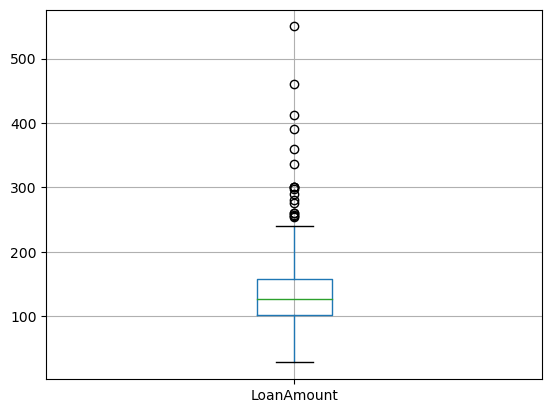

In [59]:
testdata.boxplot(column="LoanAmount")

<Axes: >

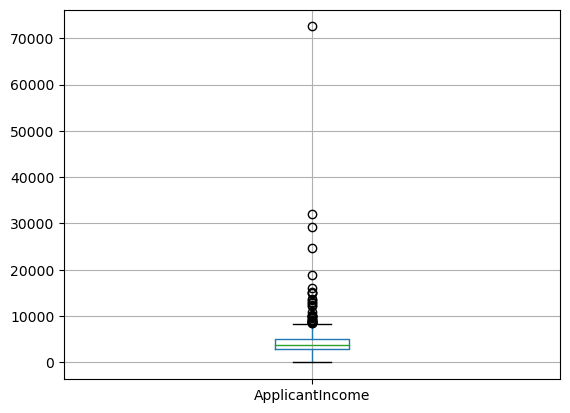

In [60]:
testdata.boxplot(column="ApplicantIncome")

<Axes: >

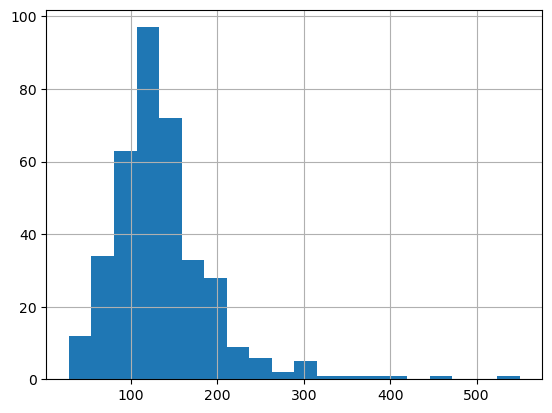

In [67]:
testdata['LoanAmount'].hist(bins=20)

In [61]:
testdata['LoanAmount_log']=np.log(testdata["LoanAmount"])

<Axes: >

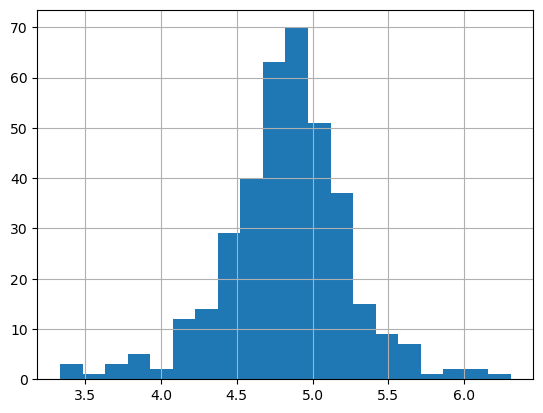

In [66]:
testdata['LoanAmount_log'].hist(bins=20)

In [68]:
testdata['TotalIncome']=testdata['ApplicantIncome']+testdata['CoapplicantIncome']

<Axes: >

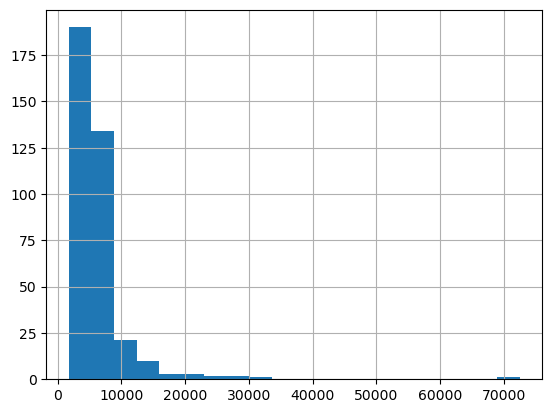

In [74]:
testdata['TotalIncome'].hist(bins=20)

In [69]:
testdata['TotalIncome_log']=np.log(testdata['TotalIncome'])


<Axes: >

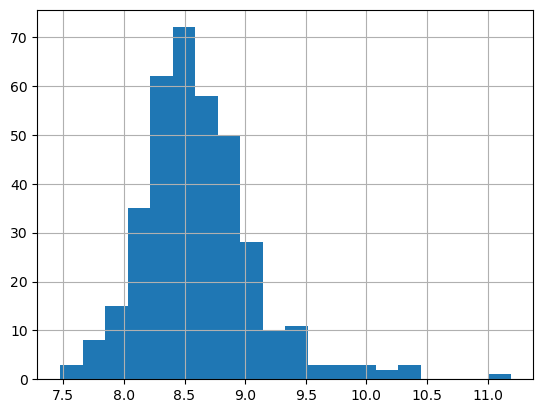

In [72]:
testdata['TotalIncome_log'].hist(bins=20)

In [75]:
test=testdata.iloc[:,np.r_[1:5,9:11,13:15]].values

In [76]:
for i in range (0,5):
    test[:,i]=labelencoder_x.fit_transform(test[:,i])

In [77]:
test[:,7]=labelencoder_x.fit_transform(test[:,7])

In [78]:
test

array([[1, 1, 0, ..., 1.0, 5720, 207],
       [1, 1, 1, ..., 1.0, 4576, 124],
       [1, 1, 2, ..., 1.0, 6800, 251],
       ...,
       [1, 0, 0, ..., 1.0, 5243, 174],
       [1, 1, 0, ..., 1.0, 7393, 268],
       [1, 0, 0, ..., 1.0, 9200, 311]], dtype=object)

Scaling the test data

In [79]:
test=ss.fit_transform(test)

In [81]:
pred=NBclassifier.predict(test)

In [82]:
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

This prediction gives us 83.7% accuracy.
1 means the person is  eligibe for the loan while 0 means person isn't eligible for loan.

In [84]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,6800,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,4886,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,3276,8.094378
